In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
a = -512
b = 512
x = np.linspace(a, b, int(1000))
def func(x):
    return -(47+x) * np.sin(np.sqrt(np.abs(512/2 + (47+x)))) - 512 * np.sin(np.sqrt(np.abs(512 - (47+x))))
y = func(x)

In [20]:
L = max(abs((func(x) - func(x - (abs(b - a) / 1000000))) / (abs(b - a) / 1000000)))

In [21]:
def inter(l, r):
    return (func(l) - func(r)) / (2*L) + (l + r) / 2;

In [22]:
def gk(x, u):
    return func(u) - L * abs(x - u)

In [27]:
U = np.array([a,b])
V = []
V.append(inter(a,b))
mins = []
mins.append(gk(inter(a,b), b))

In [28]:
%%time

for iters in range(0, 100000):
    verts =  V[np.argmin(mins)] 
    minm = np.min(mins)
    if abs(minm - func(verts)) < 0.01:
        break
    uk = verts
    U = np.append(U, [uk])
    mins.remove(minm)
    V.remove(verts)

    ulk = np.max(U[U<uk])
    urk = np.min(U[U>uk])

    v1 = inter(ulk, uk)
    v2 = inter( uk, urk)

    V += [v1, v2]
    mins += [gk(v1, ulk), gk(v2, urk)]
print("{} iterations".format(str(iters)))


13397 iterations
CPU times: user 20.3 s, sys: 65.1 ms, total: 20.4 s
Wall time: 20.4 s


In [ ]:
mins

In [25]:
print('x_min = {}, y_min = {}'.format(verts, func(verts)))

x_min = 404.23180070280387, y_min = -959.6406627208287


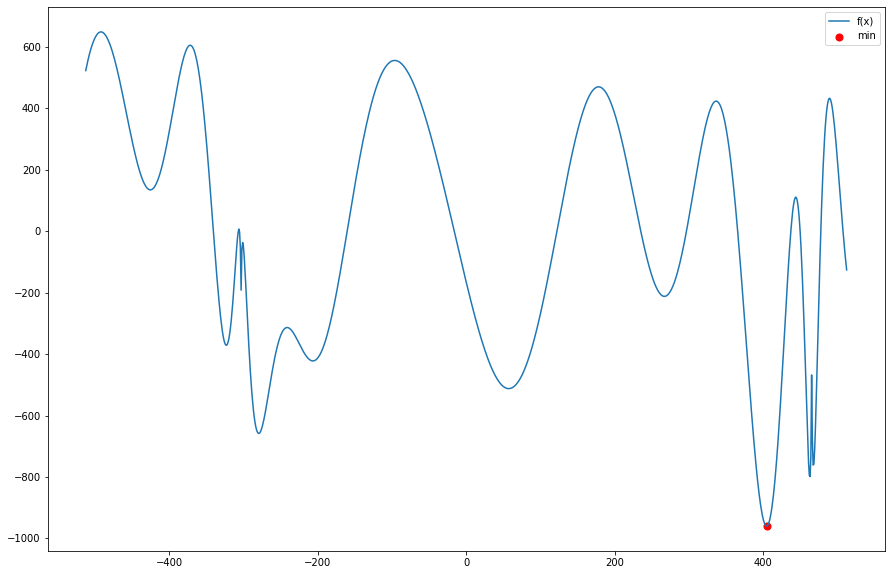

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(verts, func(verts), label='min', c='red', s=50)
plt.plot(x, func(x), label='f(x)')
plt.legend()